What happens when bears attack for a week?

MIN_PCT_LOSS = Minimum Percentage point drop over the week.

In [15]:
MIN_PCT_LOSS = -4

In [16]:
import numpy as np
import pandas as pd

from scipy import stats

import datetime
from pandas.tseries.frequencies import to_offset

import niftyutils
from niftyutils import load_nifty_data

import matplotlib.pyplot as plt
import mplfinance as fplt

In [17]:
start_date = datetime.datetime(2005,8,1)
end_date = datetime.datetime(2020,8,29)
nifty_data = load_nifty_data(start_date,end_date)

In [18]:
weekly_nifty_data = nifty_data.resample('W').agg(niftyutils.OHLC_CONVERSION_DICT)
weekly_nifty_data.index = weekly_nifty_data.index - to_offset('6D')
weekly_nifty_data.tail(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-10,11270.25,11373.60,11111.45,11178.4,2.895408e+09
2020-08-17,11248.90,11460.35,11144.50,11371.6,3.299731e+09
2020-08-24,11412.00,11686.05,11410.65,11647.6,3.441270e+09


In [19]:
weekly_returns = (weekly_nifty_data['Close']/weekly_nifty_data['Close'].shift(1) - 1)*100
weekly_returns = weekly_returns.dropna()

In [20]:
bear_weeks = weekly_returns[(weekly_returns <= MIN_PCT_LOSS)]

In [26]:
bear_weeks.sample(3)

Date
2006-07-17   -5.710215
2008-09-22   -6.124492
2009-01-05   -5.702798
Name: Close, dtype: float64

In [34]:
pct_change_after_bear_week = []
for ix, pct_chage in bear_weeks.iteritems():
    pct_change_by_week = []
    for i in range(1,5):
        after_ix = weekly_returns.index.get_loc(ix) + i
        ret = weekly_returns[after_ix]
        pct_change_by_week.append(ret)
    
    pct_change_after_bear_week.append(pct_change_by_week)

In [36]:
bear_week_study_data = pd.DataFrame(pct_change_after_bear_week, columns=['1st','2nd','3rd','4th'],
                                                  index = bear_weeks.index)
bear_week_study_data['Bear Week'] = bear_weeks.values
bear_week_study_data = bear_week_study_data[['Bear Week','1st','2nd','3rd','4th']]

In [38]:
bear_week_study_data.describe()

,Bear Week,1st,2nd,3rd,4th
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-6.265066,0.092453,-0.987945,0.599643,0.518631
std,2.526312,5.487240,5.158824,5.702183,5.328953
min,-15.949713,-15.949713,-15.949713,-15.949713,-15.949713
25%,-6.752964,-2.331947,-3.740896,-2.321974,-3.237268
50%,-5.429064,0.790471,-1.172267,1.149410,0.432061
75%,-4.735953,2.798154,2.889780,3.446820,3.497398
max,-4.093879,12.718029,11.671827,12.718029,12.718029


<AxesSubplot:>

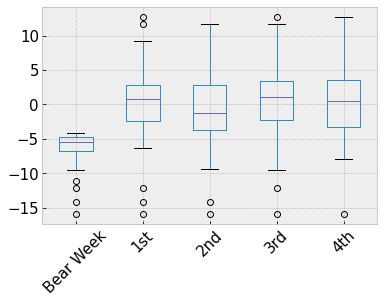

In [39]:
bear_week_study_data.boxplot(grid=True, rot=45, fontsize=15)

In [44]:
bear_week_study_data[bear_week_study_data['Bear Week'].between(-7.0,-4.0)].describe()

,Bear Week,1st,2nd,3rd,4th
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-5.146384,0.101069,-0.262244,0.698319,0.586122
std,0.731519,5.153505,4.693209,4.975320,5.448231
min,-6.785194,-15.949713,-14.099206,-15.949713,-15.949713
25%,-5.687848,-2.331947,-3.223997,-1.900883,-2.735213
50%,-5.069181,1.388235,-1.085444,1.149410,0.432061
75%,-4.538719,2.798154,3.018768,3.086873,4.828515
max,-4.093879,12.718029,11.671827,10.744376,11.671827
